In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-cancer-recurrence-prediction/Thyroid_Diff.csv


# Import Packages

In [2]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Read Dataset

In [3]:
dataset=pd.read_csv('/kaggle/input/thyroid-cancer-recurrence-prediction/Thyroid_Diff.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(383, 17)


In [4]:
## print the top5 records
dataset.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [6]:
# Verifying data types and integrity
print("\nData Types:")
print(dataset.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(dataset.describe())


Data Types:
Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

Descriptive Statistics:
              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.000000
75%     51.000000
max     82.000000


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['Recurred']=le.fit_transform(dataset['Recurred'])
Recurred_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
Recurred_name_mapping

{'No': 0, 'Yes': 1}

In [8]:
pd.DataFrame(Recurred_name_mapping.items())

,0,1
0,No,0
1,Yes,1


In [9]:
dataset.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0


# EDA
## Missing features

In [10]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

No Missing Feature

## Numerical Variables

In [11]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  2


,Age,Recurred
0,27,0
1,34,0
2,30,0
3,62,0
4,62,0


In [12]:
dataset.describe()

,Age,Recurred
count,383.000000,383.000000
mean,40.866841,0.281984
std,15.134494,0.450554
min,15.000000,0.000000
25%,29.000000,0.000000
50%,37.000000,0.000000
75%,51.000000,1.000000
max,82.000000,1.000000


## Temporal Variables(Eg: Datetime Variables)

In [13]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

## Numerical variables are usually of 2 type
## 1. Discrete Features and Continous Features

In [14]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [15]:
discrete_feature

['Recurred']

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


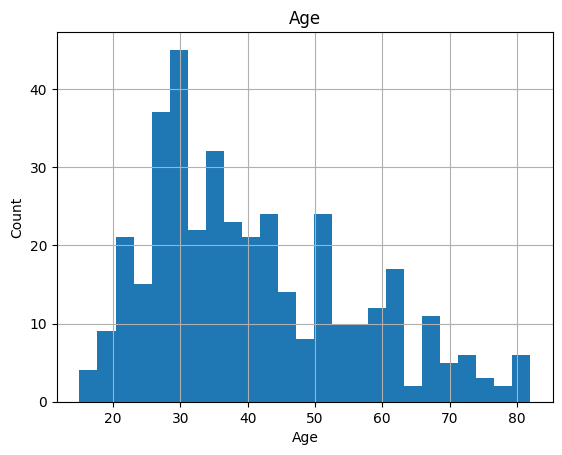

In [17]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers In Numerical Feature

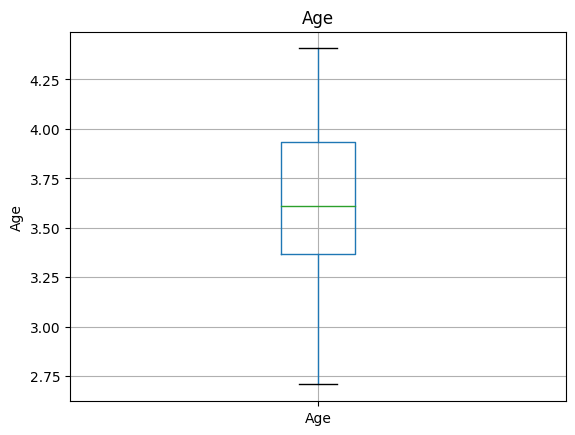

In [18]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Categorical Features

In [19]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [20]:
dataset[categorical_features].head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [21]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Gender and number of categories are 2
The feature is Smoking and number of categories are 2
The feature is Hx Smoking and number of categories are 2
The feature is Hx Radiothreapy and number of categories are 2
The feature is Thyroid Function and number of categories are 5
The feature is Physical Examination and number of categories are 5
The feature is Adenopathy and number of categories are 6
The feature is Pathology and number of categories are 4
The feature is Focality and number of categories are 2
The feature is Risk and number of categories are 3
The feature is T and number of categories are 7
The feature is N and number of categories are 3
The feature is M and number of categories are 2
The feature is Stage and number of categories are 5
The feature is Response and number of categories are 4


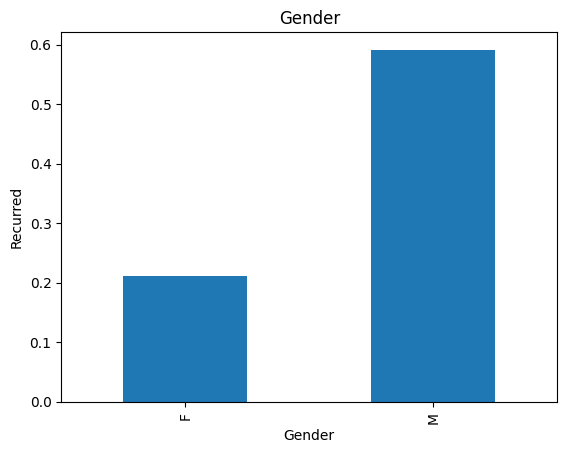

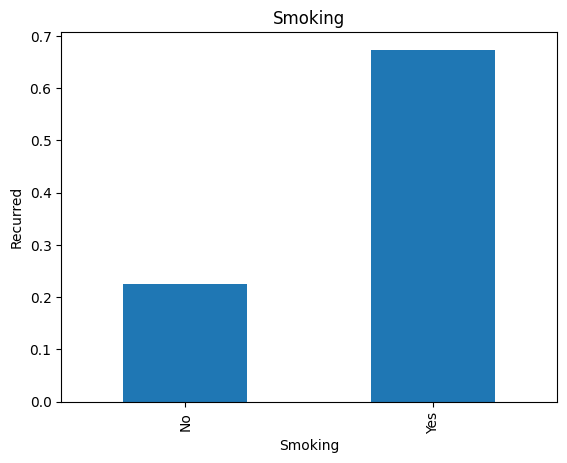

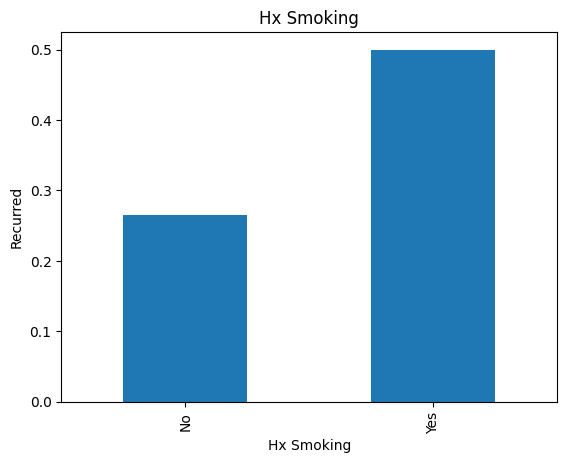

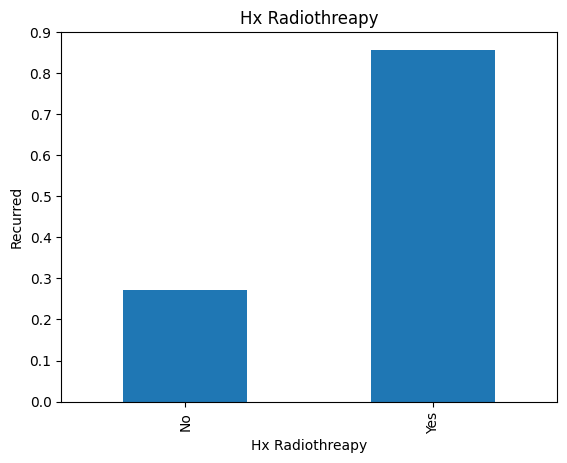

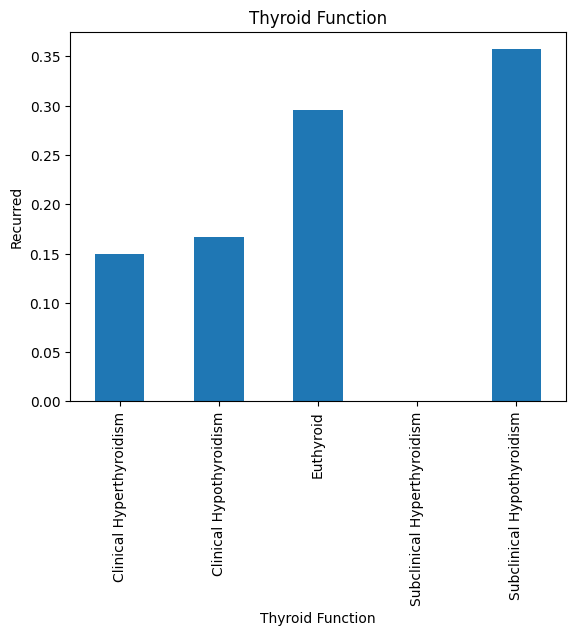

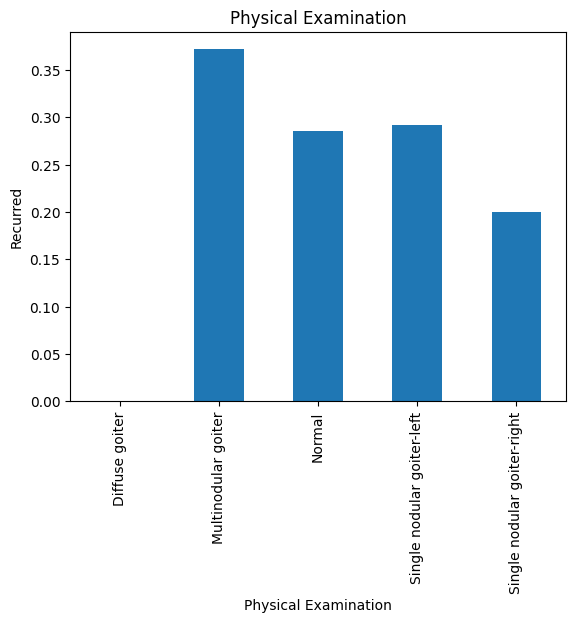

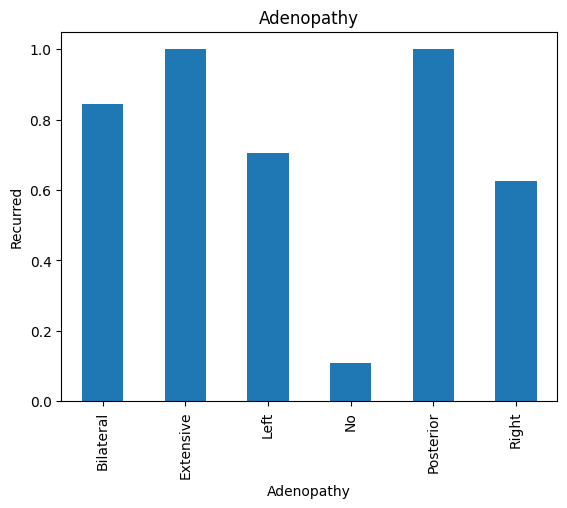

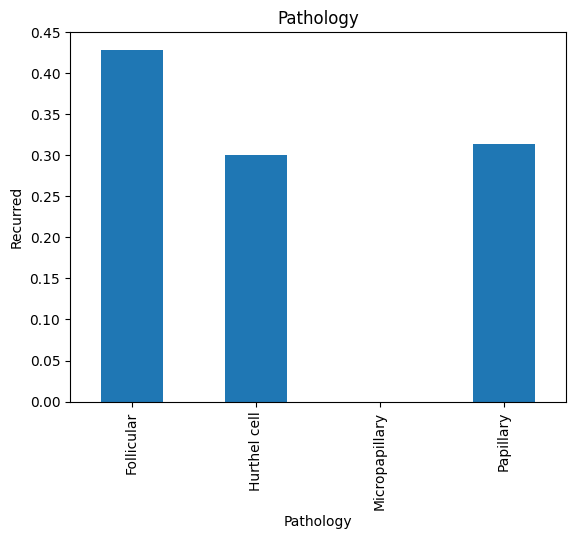

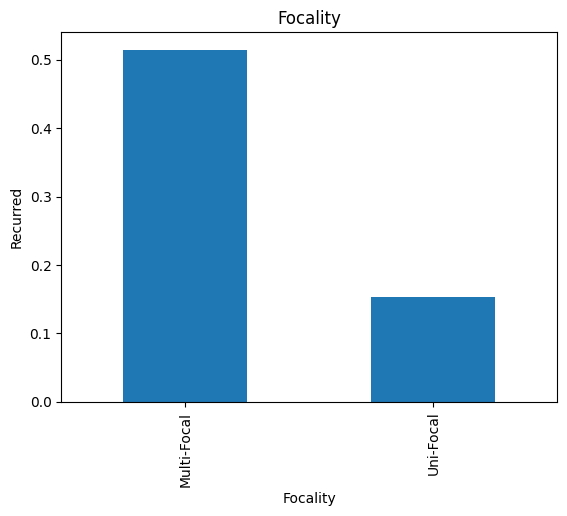

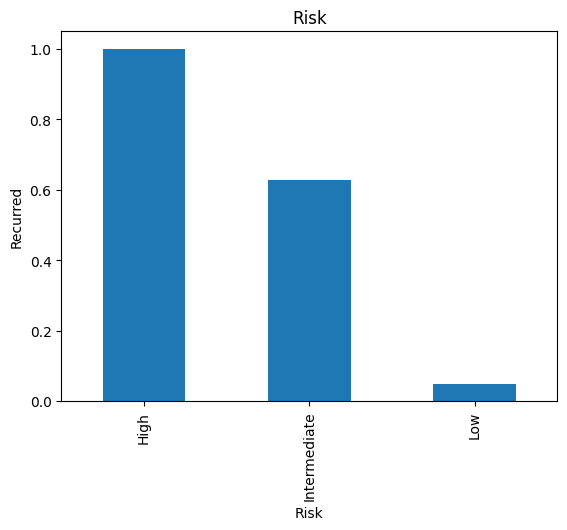

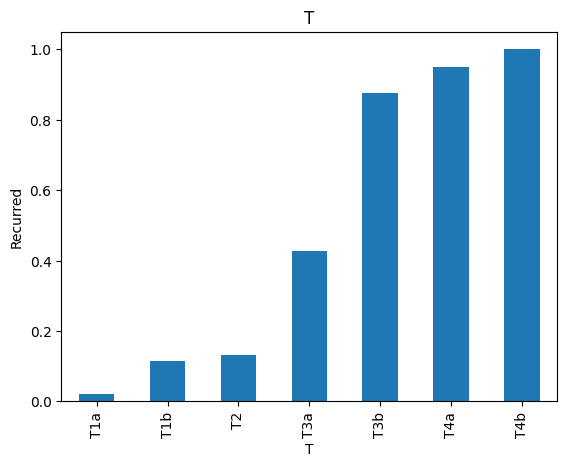

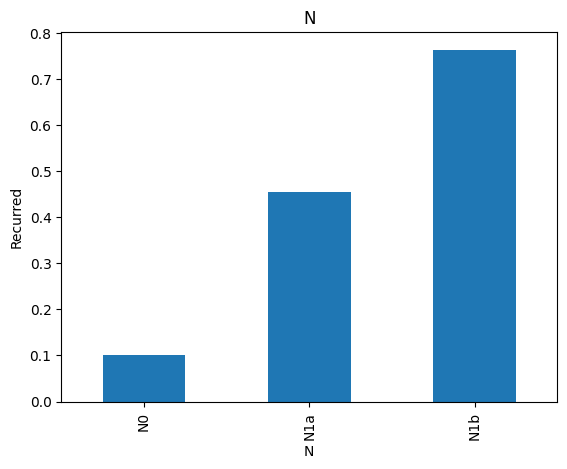

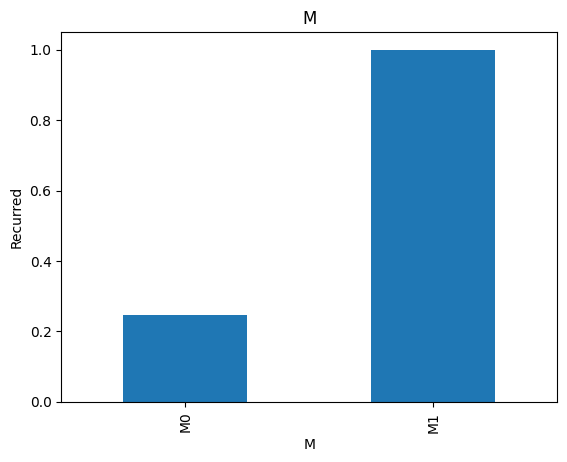

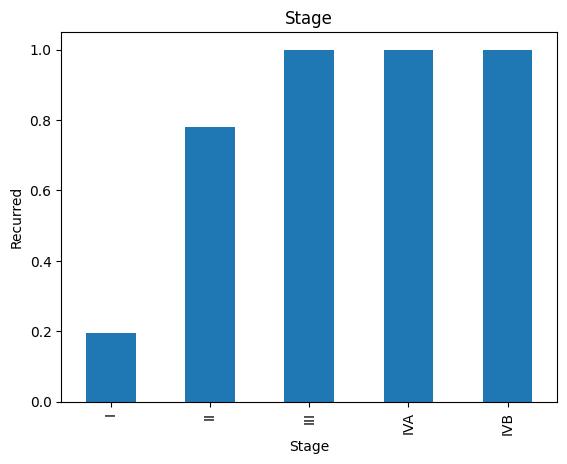

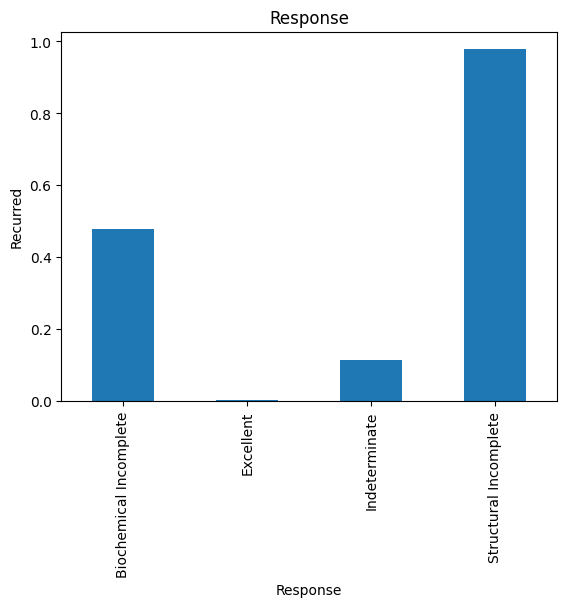

In [22]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Recurred'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Recurred')
    plt.title(feature)
    plt.show()

In [23]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# dataset['NObeyesdad']=le.fit_transform(dataset['NObeyesdad'])
# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# le_name_mapping

In [24]:

le_cat_name=dict()
cat_le = preprocessing.LabelEncoder()
for i in categorical_features:
    dataset[i]=cat_le.fit_transform(dataset[i])
    le_cat_name[i] = dict(zip(cat_le.classes_, cat_le.transform(cat_le.classes_)))

In [25]:
pd.DataFrame(le_cat_name.items())

,0,1
0,Gender,"{'F': 0, 'M': 1}"
1,Smoking,"{'No': 0, 'Yes': 1}"
2,Hx Smoking,"{'No': 0, 'Yes': 1}"
3,Hx Radiothreapy,"{'No': 0, 'Yes': 1}"
4,Thyroid Function,"{'Clinical Hyperthyroidism': 0, 'Clinical Hypo..."
5,Physical Examination,"{'Diffuse goiter': 0, 'Multinodular goiter': 1..."
6,Adenopathy,"{'Bilateral': 0, 'Extensive': 1, 'Left': 2, 'N..."
7,Pathology,"{'Follicular': 0, 'Hurthel cell': 1, 'Micropap..."
8,Focality,"{'Multi-Focal': 0, 'Uni-Focal': 1}"
9,Risk,"{'High': 0, 'Intermediate': 1, 'Low': 2}"


In [26]:
dataset.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


# Feature Slection

In [27]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [28]:
## Capture the dependent feature
X=dataset.drop(['Recurred'],axis=1)
y=dataset[['Recurred']]

In [29]:
X.shape,y.shape

((383, 16), (383, 1))

In [30]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [31]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
       False,  True,  True,  True, False, False,  True])

In [32]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 16
selected features: 8
features with coefficients shrank to zero: 8


In [33]:
selected_feat

Index(['Age', 'Gender', 'Hx Smoking', 'Physical Examination', 'Risk', 'T', 'N',
       'Response'],
      dtype='object')

In [34]:
#X=X[selected_feat]

In [35]:
X.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1


<Axes: >

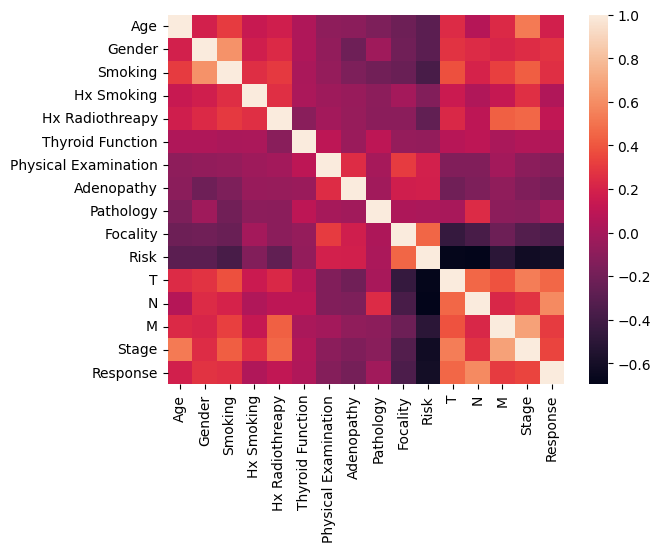

In [36]:
sns.heatmap(X.corr())

In [37]:
X.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1


# Model Building

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

/tmp/ipykernel_18/324425438.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [40]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [41]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9652173913043478


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,
                             precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score)

In [43]:
models={
    "Decison Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":xgb.XGBClassifier(objective="binary:logistic", random_state=42),
    "GradientBoost":GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "AdaBoost":AdaBoostClassifier(n_estimators=100, random_state=0),
    "CatBoost":CatBoostClassifier(learning_rate= 0.1, depth=6, l2_leaf_reg= 3, iterations= 100)
    
}

In [44]:
!pip install dagshub
!pip install mlflow

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 3.9 MB/s eta 0:00:00
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10487 sha256=6370f86fe6657da842c958cddf30289e688d2a754ed796aa28671e17b25a54e3
  Stored in directory: /root/.cache/pip/wheels/c0/18/f6/f0d6be9d0435e2677ce5cc758e91da50053dce

In [45]:
import dagshub
dagshub.init(repo_owner='SunilKumar-ugra', repo_name='Thyroid-Cancer-Recurrence-Prediction', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=6fce6515-2e9b-4b40-a117-17d6b54f3881&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=a07a947fc3645e3aaea840a941b3ce10be72c3dda69f2b6e61599be1f24359bd




Initialized MLflow to track repo "SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction"

Repository SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction initialized!

In [46]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction.mlflow")
mlflow.set_experiment("Thyroid Cancer Recurrence Prediction")

<Experiment: artifact_location='mlflow-artifacts:/16c9651c12c140aa9dc9d4eace94e477', creation_time=1716650019448, experiment_id='0', last_update_time=1716650019448, lifecycle_stage='active', name='Thyroid Cancer Recurrence Prediction', tags={'mlflow.sharedViewState.f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca': '{"searchFilter":"","orderByKey":"metrics.`Test '
                                                                                            'Accuracy`","orderByAsc":false,"startTime":"ALL","lifecycleFilter":"Active","datasetsFilter":[],"modelVersionFilter":"All '
                                                                                            'Runs","selectedColumns":["attributes.`Source`","attributes.`Models`","metrics.`Train '
                                                                                            'Accuracy`","metrics.`Test '
                                                                                            'Accurac

In [47]:
def classification_performace_matric(actual, pred,avg):
        acc=accuracy_score(actual,pred)
        f1=f1_score(actual,pred,average=avg)
        precission=precision_score(actual,pred,average=avg)
        recall=recall_score(actual,pred,average=avg)
        return acc,f1,precission,recall

In [48]:
mlflow.sklearn.autolog(disable=True)

for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    
    with mlflow.start_run(run_name=str(model_name)):
        mlflow.set_tag("model_name", str(model_name))
        
        model.fit(X_train,y_train)
    
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)
        
        
        #training   performance
        (trn_acc,trn_f1,trn_precission,trn_recall)=classification_performace_matric(y_train,y_train_pred,'weighted')
        
        #testing   performance
        (tst_acc,tst_f1,tst_precission,tst_recall)=classification_performace_matric(y_test,y_test_pred,'weighted')
        
        
        
        #train performance log
        
        mlflow.log_metric("Train Accuracy", trn_acc)
        mlflow.log_metric("Train F1 Score",trn_f1)
        mlflow.log_metric("Train Precision",trn_precission)
        mlflow.log_metric("Train Recall",trn_recall)
        
        # test performance log
        
        mlflow.log_metric("Test Accuracy", tst_acc)
        mlflow.log_metric("Test F1 Score",tst_f1)
        mlflow.log_metric("Test Precision",tst_precission)
        mlflow.log_metric("Test Recall",tst_recall)
        
        #Model log
        mlflow.sklearn.log_model(model, str(model_name)+"_model")

/tmp/ipykernel_18/3687507582.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before S

0:	learn: 0.6292586	total: 52.4ms	remaining: 5.19s
1:	learn: 0.5803514	total: 53ms	remaining: 2.6s
2:	learn: 0.5421869	total: 53.3ms	remaining: 1.72s
3:	learn: 0.5036847	total: 53.7ms	remaining: 1.29s
4:	learn: 0.4686956	total: 54ms	remaining: 1.03s
5:	learn: 0.4318224	total: 54.3ms	remaining: 850ms
6:	learn: 0.4059669	total: 54.6ms	remaining: 726ms
7:	learn: 0.3778390	total: 55ms	remaining: 633ms
8:	learn: 0.3547060	total: 55.4ms	remaining: 560ms
9:	learn: 0.3346368	total: 55.7ms	remaining: 501ms
10:	learn: 0.3179591	total: 56ms	remaining: 453ms
11:	learn: 0.2969079	total: 56.2ms	remaining: 412ms
12:	learn: 0.2829121	total: 56.6ms	remaining: 379ms
13:	learn: 0.2730625	total: 56.9ms	remaining: 350ms
14:	learn: 0.2629350	total: 57.3ms	remaining: 325ms
15:	learn: 0.2514453	total: 57.6ms	remaining: 302ms
16:	learn: 0.2404014	total: 57.9ms	remaining: 283ms
17:	learn: 0.2331382	total: 58.3ms	remaining: 265ms
18:	learn: 0.2236564	total: 58.6ms	remaining: 250ms
19:	learn: 0.2147043	total: 59m

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Result

[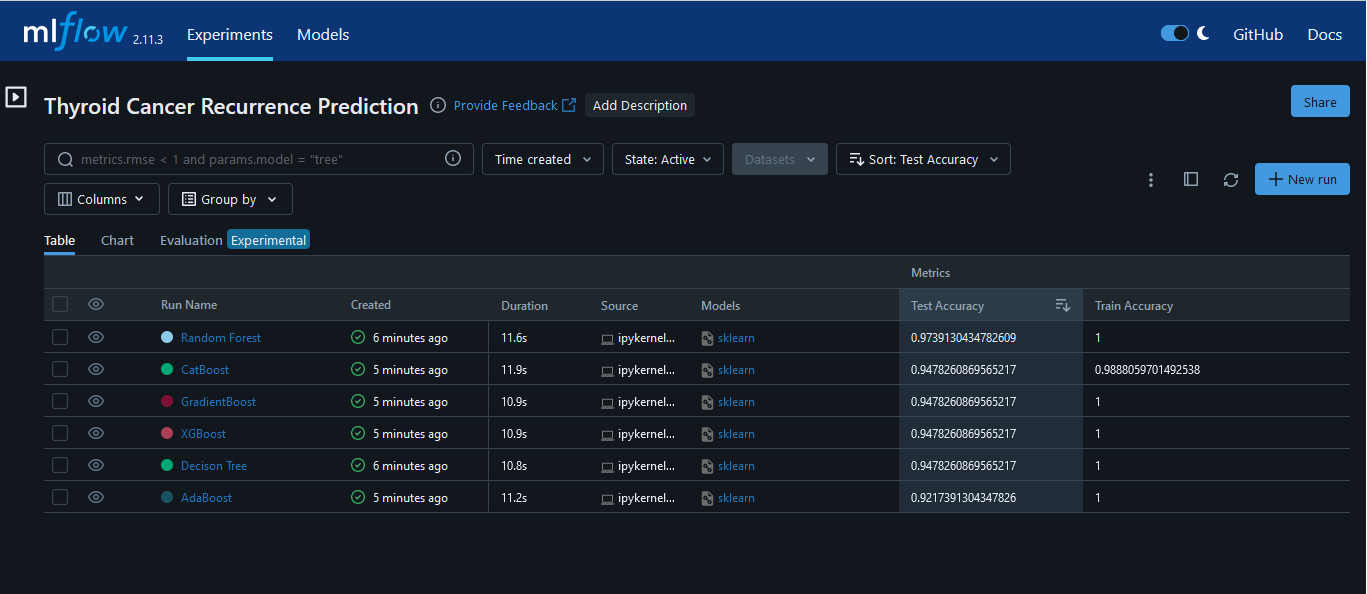](https://dagshub.com/SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction.mlflow/#/experiments/0?viewStateShareKey=f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca)